In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

# File path and name
file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Pandora_2_L0/Pandora76s1_Dhaka_20240601_L1_smca1c3d20221213p1-8.txt'

base_name = os.path.basename(file_path)

# Read the entire file
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()

# Extract the line containing the nominal wavelengths
nominal_wavelengths_line = lines[22].strip()  # Line 23 in the file (index 22)

# Split the line into individual wavelengths and convert them to float
wavelength_3 = np.array([float(value) for value in nominal_wavelengths_line.split(': ')[1].split()])

# Skip the initial 89 rows
data_lines = lines[89:]

# Process each line to split into rows and columns
data_list = []
for line in data_lines:
    # Strip the newline character and split by tabs
    rows = line.strip().split('\t')
    for row in rows:
        # Split each row by spaces
        columns = row.split()
        data_list.append(columns)

# Convert the list of lists into a DataFrame
data1 = pd.DataFrame(data_list)

# Convert the necessary columns to numeric before saving
data1.iloc[:, 2:6205] = data1.iloc[:, 2:6205].apply(pd.to_numeric, errors='coerce')


In [46]:
# Define the conditions
conditions = {
    "SQ_0d_1_4": (data1[0] == "SQ") & (data1[11] == 1) & (data1[12] == 4)
}

# Create variables for filtered data
filtered_data = {key: data1.loc[condition, 61:2108] for key, condition in conditions.items()}

# Extract the data and calculate the mean
#SQ_0d_1_4 = filtered_data["SQ_0d_1_4"].reset_index(drop=True)
SQ_0d_1_4_3 = filtered_data["SQ_0d_1_4"].reset_index(drop=True)


# Function to normalize
def normalize(data):
    return (data / np.max(data))

#general_intensities = normalize(SQ_0d_1_4.iloc[0, :])
#spectrometer_intensities = normalize(SQ_0d_1_4_2.iloc[150, :])
#spectrometer_intensities_2 = normalize(SQ_0d_1_4_3.iloc[0, :])
spectrometer_intensities_3 = normalize(SQ_0d_1_4_3.iloc[0, :]).values

# Save the Data

In [220]:
import pandas as pd

# Create a DataFrame to save the data
data_to_save = pd.DataFrame({
    'wavelength_pandora_02': wavelength_1,
    'general_intensities': general_intensities,
    'wavelength_pandora_173': wavelength_2,
    'spectrometer_intensities': spectrometer_intensities,
    'wavelength_pandora_76': wavelength_3,
    'spectrometer_intensities_2': spectrometer_intensities_2
})

# Save to a CSV file
csv_file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/calibration_sop/wv_intensities_data.csv'
data_to_save.to_csv(csv_file_path, index=False)

# Load Wavelength and Irradiance data

In [1]:
import pandas as pd
# Load the CSV file
loaded_data = pd.read_csv('/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/calibration_sop/wv_intensities_data_2.csv')

# Assign the intensities and wavelengths
wavelength_1 = loaded_data['wavelength_pandora_02'].values
general_intensities = loaded_data['general_intensities'].values

wavelength_2 = loaded_data['wavelength_pandora_173'].values
spectrometer_intensities_2 = loaded_data['spectrometer_intensities'].values

wavelength_3 = loaded_data['wavelength_pandora_76'].values
spectrometer_intensities_3 = loaded_data['spectrometer_intensities_2'].values


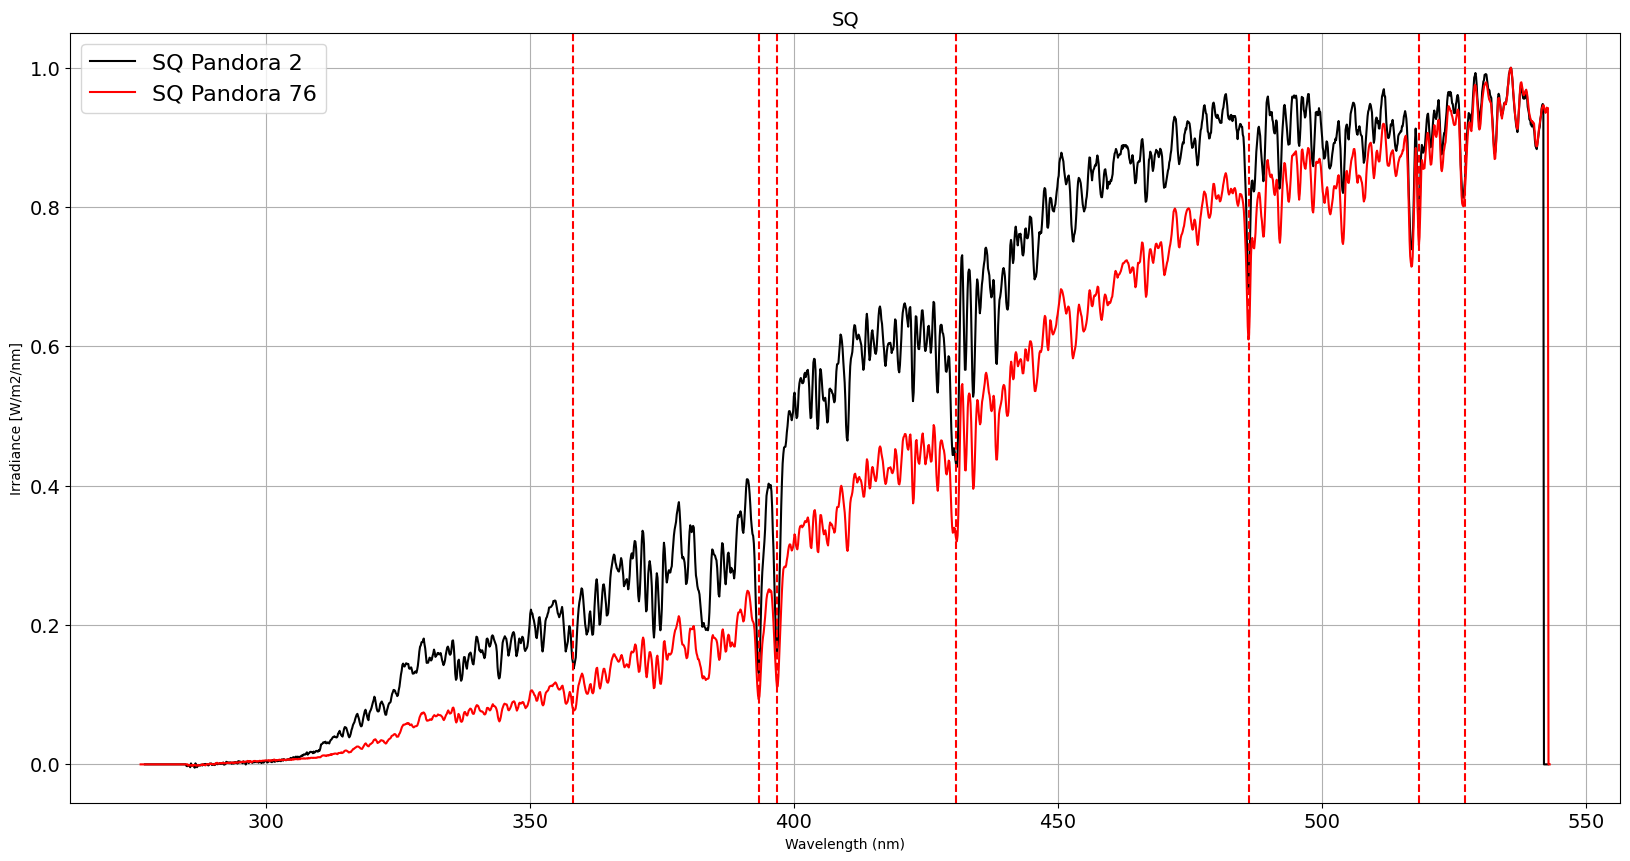

In [3]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 10))
plt.plot(wavelength_1, general_intensities, label='SQ Pandora 2', color='black')
#plt.plot(wavelength_2, spectrometer_intensities_2, label='SQ Pandora 173')
plt.plot(wavelength_3, spectrometer_intensities_3, label='SQ Pandora 76', color='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Irradiance [W/m2/nm]')
#plt.xlim(500, 550)
plt.legend(fontsize=16)
plt.title('SQ', fontsize=14)
# Define the x_nm values for the dotted lines
dotted_lines = [358.121, 393.366, 396.847, 430.774, 486.134, 518.362, 527.039] #382.044

# Draw dotted vertical lines at the specified x_nm values
for line in dotted_lines:
    plt.axvline(x=line, color='red', linestyle='--')  # Dotted red lines

plt.show()

# Part 1: Find Dips

19
19


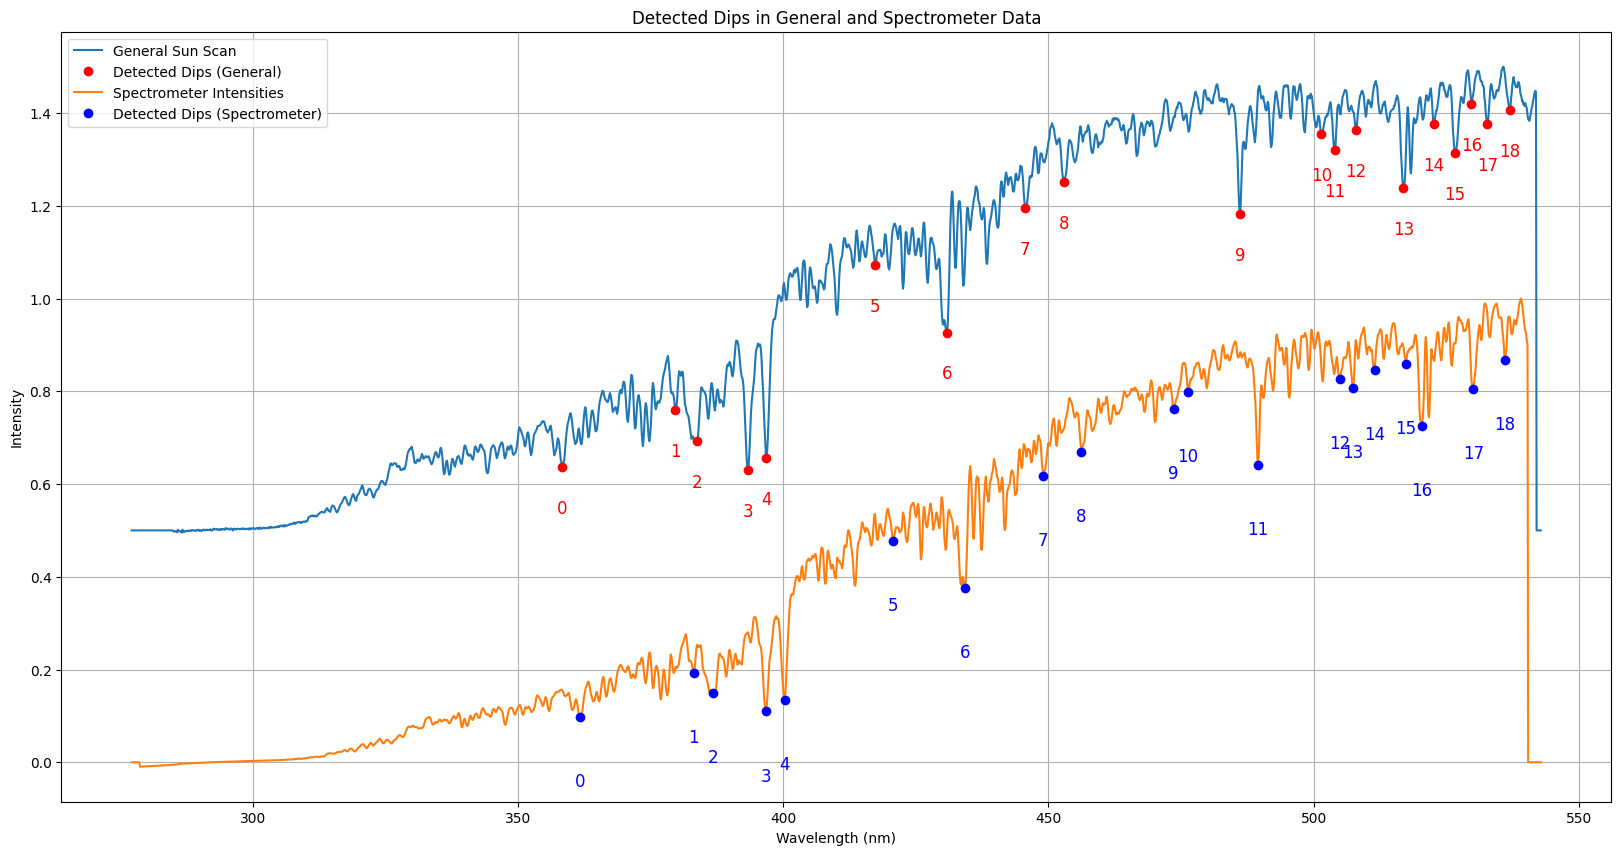

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming general_wavelengths, general_intensities, and spectrometer_intensities are already loaded
general_wavelengths = np.array(wavelength_1)
general_intensities = np.array(general_intensities)
spectrometer_intensities = np.array(spectrometer_intensities_2)

spectrometer_pixels = np.arange(2048)  # Pixels are numbered from 0 to 2047

# Normalize the intensity data to focus on the shapes
general_intensities_norm = general_intensities / np.max(general_intensities)
spectrometer_intensities_norm = spectrometer_intensities / np.max(spectrometer_intensities)

# Detect dips in both spectra
# Set parameters for peak detection for Genneral
prominence_threshold_1 = 0.065  # Adjust this as needed
min_width_1 = 7  # Minimum width of the dips
min_distance_1 = 20 # Minimum distance between dips

# Set parameters for peak detection for calibration
prominence_threshold_2 = 0.04  # Adjust this as needed
min_width_2 = 7  # Minimum width of the dips
min_distance_2 = 20  # Minimum distance between dips


# Find dips in general_intensities
general_inverted = -general_intensities_norm
general_peaks, _ = find_peaks(general_inverted, prominence=prominence_threshold_1, width=min_width_1, distance=min_distance_1)
dips_wavelengths_general = general_wavelengths[general_peaks]

# Find dips in spectrometer_intensities
spectrometer_inverted = -spectrometer_intensities_norm
spectrometer_peaks, _ = find_peaks(spectrometer_inverted, prominence=prominence_threshold_2, width=min_width_2, distance=min_distance_2)

print(len(general_peaks))
print(len(spectrometer_peaks))

# Plot the general sun scan with detected dips
plt.figure(figsize=(20, 10))
plt.plot(general_wavelengths, general_intensities+0.5, label='General Sun Scan')
plt.plot(general_wavelengths[general_peaks], general_intensities[general_peaks]+0.5, 'ro', label='Detected Dips (General)')
plt.plot(general_wavelengths, spectrometer_intensities, label='Spectrometer Intensities')
plt.plot(general_wavelengths[spectrometer_peaks], spectrometer_intensities[spectrometer_peaks], 'bo', label='Detected Dips (Spectrometer)')

# Annotate the peaks with their index numbers
for i, peak in enumerate(general_peaks):
    plt.text(general_wavelengths[peak], general_intensities[peak]+0.4, str(i), color='red', fontsize=12, ha='center')

for i, peak in enumerate(spectrometer_peaks):
    plt.text(general_wavelengths[peak], spectrometer_intensities[peak]-0.15, str(i), color='blue', fontsize=12, ha='center')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Detected Dips in General and Spectrometer Data')
plt.grid(True)
plt.legend()
plt.show()


# Part 2: Adjust The dips

In [5]:
# Deleting the specified indices [0, 5, 7, 9, 14] [15, 18]
general_peaks = np.delete(general_peaks, [14, 16, 18])
spectrometer_peaks = np.delete(spectrometer_peaks, [9, 10, 15])

# Update dips_wavelengths_general after deletion
dips_wavelengths_general = general_wavelengths[general_peaks]

print(len(general_peaks))
print(len(spectrometer_peaks))

16
16


# Part 3: Linear Interpolation

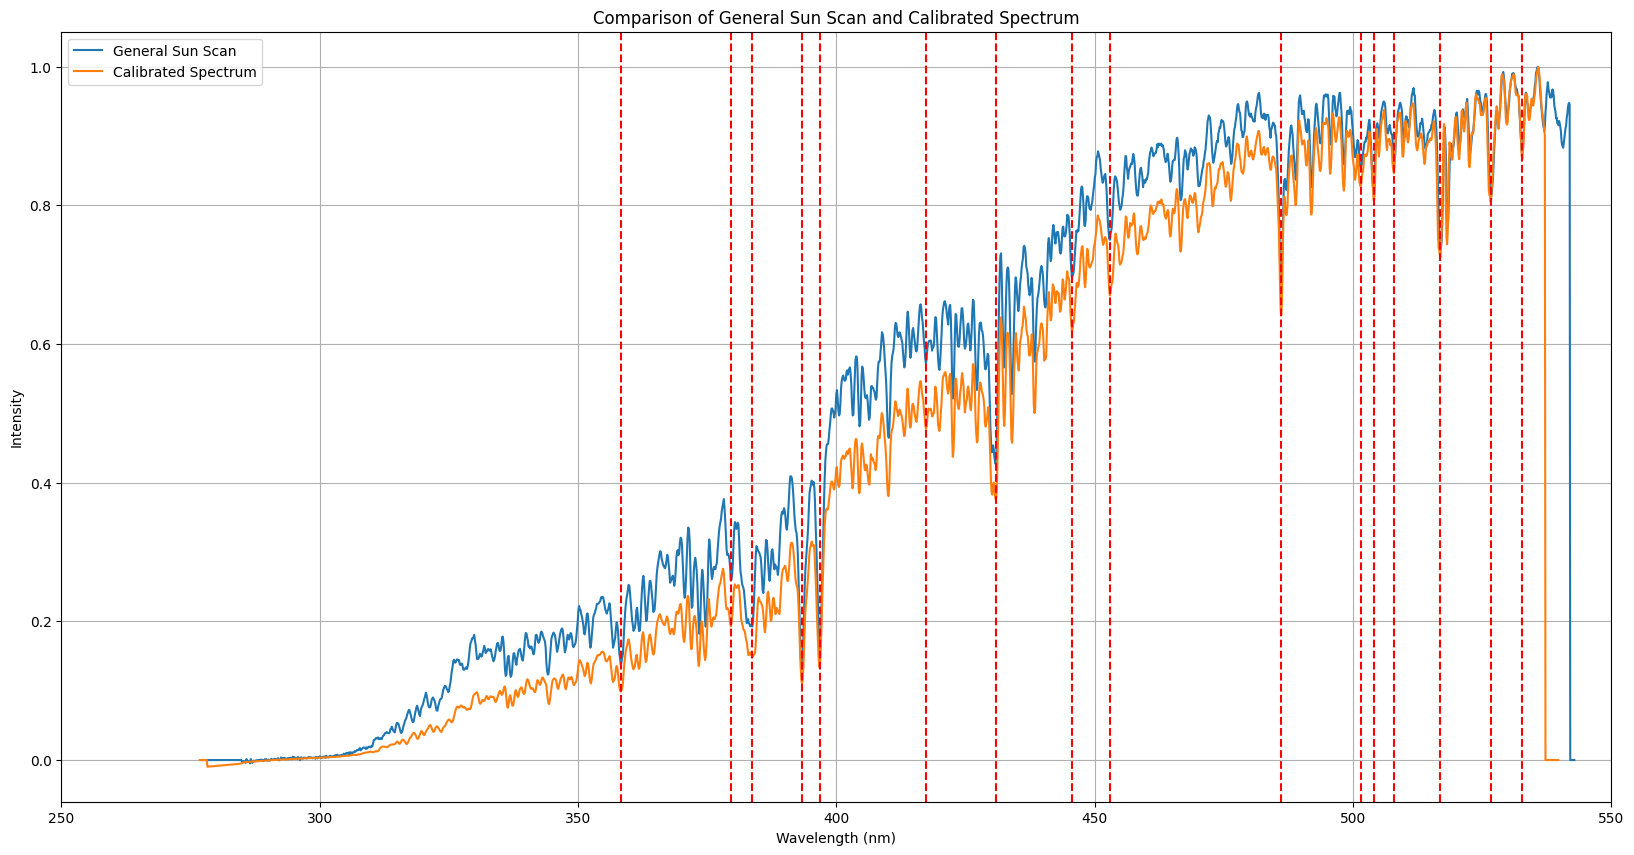

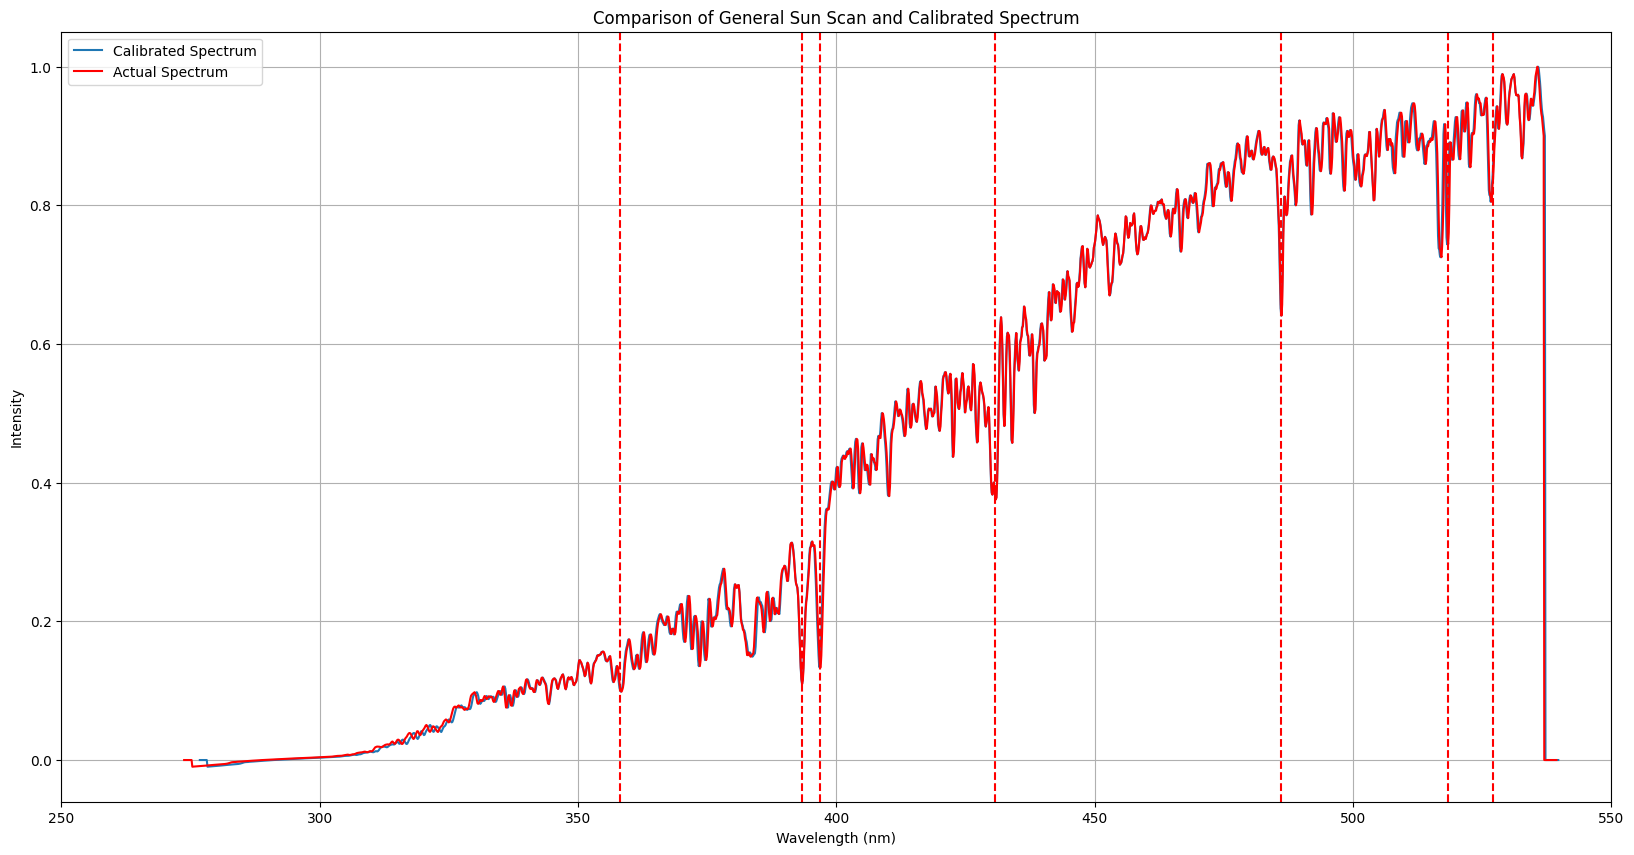

In [6]:
from scipy.interpolate import interp1d

# Part 3: Determine Calibrated Wavelengths and Plot

# Perform Linear Interpolation
linear_interp = interp1d(spectrometer_peaks, dips_wavelengths_general, kind='linear', fill_value="extrapolate")

# Apply the linear interpolation to all spectrometer pixels
calibrated_wavelengths = linear_interp(spectrometer_pixels)

# Plot the calibrated spectrum and draw vertical lines at detected dips

# Plot the general sun scan
plt.figure(figsize=(20, 10))
plt.plot(general_wavelengths, general_intensities, label='General Sun Scan')
plt.plot(calibrated_wavelengths, spectrometer_intensities, label='Calibrated Spectrum')
plt.xlim(250, 550)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Comparison of General Sun Scan and Calibrated Spectrum')
plt.grid(True)
plt.legend()
# Draw dotted vertical lines at the detected dips
for dip_wavelength in dips_wavelengths_general:
    plt.axvline(x=dip_wavelength, color='red', linestyle='--')  # Dotted red lines
plt.show()


# Plot the general sun scan
plt.figure(figsize=(20, 10))
plt.plot(calibrated_wavelengths, spectrometer_intensities, label='Calibrated Spectrum')
plt.plot(wavelength_2, spectrometer_intensities_2, label='Actual Spectrum', color='red')
plt.xlim(250, 550)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Comparison of General Sun Scan and Calibrated Spectrum')
plt.grid(True)
plt.legend()

dotted_lines = [358.121, 393.366, 396.847, 430.774, 486.134, 518.362, 527.039]
# Draw dotted vertical lines at the specified x_nm values
for line in dotted_lines:
    plt.axvline(x=line, color='red', linestyle='--')  # Dotted red lines

plt.show()

# Error Calculation

In [7]:
import pandas as pd
import numpy as np

np.set_printoptions(threshold = np.inf)


# Step 1: Load the Excel file
file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/calibration_sop/wv.xlsx'
data = pd.read_excel(file_path)

# Step 2: Extract actual_wavelength values
actual_wavelength = data.iloc[0:2048, 3].values

# Step 4: Calculate the difference between actual_wavelength and calibrated_wavelengths
differences = np.round(np.abs(actual_wavelength - calibrated_wavelengths), 2)

# Step 5: Calculate and print the mean error
mean_error = np.mean(differences)
print(f"Mean Absolute Error: {mean_error:.4f} nm")

# Print the differences
print("Differences between actual_wavelength and calibrated_wavelengths:")
print(differences)


Mean Absolute Error: 0.4057 nm
Differences between actual_wavelength and calibrated_wavelengths:
[3.04 3.03 3.02 3.01 3.   2.99 2.98 2.97 2.96 2.95 2.94 2.93 2.92 2.91
 2.9  2.89 2.88 2.88 2.87 2.86 2.85 2.84 2.83 2.82 2.81 2.8  2.79 2.78
 2.77 2.77 2.76 2.75 2.74 2.73 2.72 2.71 2.7  2.69 2.68 2.68 2.67 2.66
 2.65 2.64 2.63 2.62 2.61 2.6  2.6  2.59 2.58 2.57 2.56 2.55 2.54 2.54
 2.53 2.52 2.51 2.5  2.49 2.48 2.47 2.47 2.46 2.45 2.44 2.43 2.42 2.42
 2.41 2.4  2.39 2.38 2.37 2.37 2.36 2.35 2.34 2.33 2.32 2.32 2.31 2.3
 2.29 2.28 2.27 2.27 2.26 2.25 2.24 2.23 2.23 2.22 2.21 2.2  2.19 2.19
 2.18 2.17 2.16 2.15 2.15 2.14 2.13 2.12 2.11 2.11 2.1  2.09 2.08 2.08
 2.07 2.06 2.05 2.04 2.04 2.03 2.02 2.01 2.01 2.   1.99 1.98 1.98 1.97
 1.96 1.95 1.95 1.94 1.93 1.92 1.92 1.91 1.9  1.89 1.89 1.88 1.87 1.86
 1.86 1.85 1.84 1.84 1.83 1.82 1.81 1.81 1.8  1.79 1.78 1.78 1.77 1.76
 1.76 1.75 1.74 1.73 1.73 1.72 1.71 1.71 1.7  1.69 1.69 1.68 1.67 1.66
 1.66 1.65 1.64 1.64 1.63 1.62 1.62 1.61 1.6  1.6  1

In [8]:
print(actual_wavelength)

[273.779  273.9232 274.0674 274.2116 274.3558 274.4999 274.644  274.7882
 274.9323 275.0763 275.2204 275.3645 275.5085 275.6525 275.7965 275.9405
 276.0845 276.2285 276.3724 276.5163 276.6602 276.8041 276.948  277.0919
 277.2357 277.3796 277.5234 277.6672 277.811  277.9547 278.0985 278.2422
 278.3859 278.5296 278.6733 278.817  278.9607 279.1043 279.2479 279.3915
 279.5351 279.6787 279.8223 279.9658 280.1093 280.2528 280.3963 280.5398
 280.6833 280.8267 280.9702 281.1136 281.257  281.4003 281.5437 281.6871
 281.8304 281.9737 282.117  282.2603 282.4036 282.5468 282.6901 282.8333
 282.9765 283.1197 283.2629 283.406  283.5492 283.6923 283.8354 283.9785
 284.1216 284.2646 284.4077 284.5507 284.6937 284.8367 284.9797 285.1226
 285.2656 285.4085 285.5514 285.6943 285.8372 285.9801 286.123  286.2658
 286.4086 286.5514 286.6942 286.837  286.9797 287.1225 287.2652 287.4079
 287.5506 287.6933 287.8359 287.9786 288.1212 288.2638 288.4064 288.549
 288.6916 288.8341 288.9767 289.1192 289.2617 289.40

In [9]:
print(calibrated_wavelengths)

[276.81427532 276.94896329 277.08365127 277.21833924 277.35302722
 277.48771519 277.62240316 277.75709114 277.89177911 278.02646709
 278.16115506 278.29584304 278.43053101 278.56521899 278.69990696
 278.83459494 278.96928291 279.10397089 279.23865886 279.37334684
 279.50803481 279.64272278 279.77741076 279.91209873 280.04678671
 280.18147468 280.31616266 280.45085063 280.58553861 280.72022658
 280.85491456 280.98960253 281.12429051 281.25897848 281.39366646
 281.52835443 281.66304241 281.79773038 281.93241835 282.06710633
 282.2017943  282.33648228 282.47117025 282.60585823 282.7405462
 282.87523418 283.00992215 283.14461013 283.2792981  283.41398608
 283.54867405 283.68336203 283.81805    283.95273797 284.08742595
 284.22211392 284.3568019  284.49148987 284.62617785 284.76086582
 284.8955538  285.03024177 285.16492975 285.29961772 285.4343057
 285.56899367 285.70368165 285.83836962 285.97305759 286.10774557
 286.24243354 286.37712152 286.51180949 286.64649747 286.78118544
 286.9158734